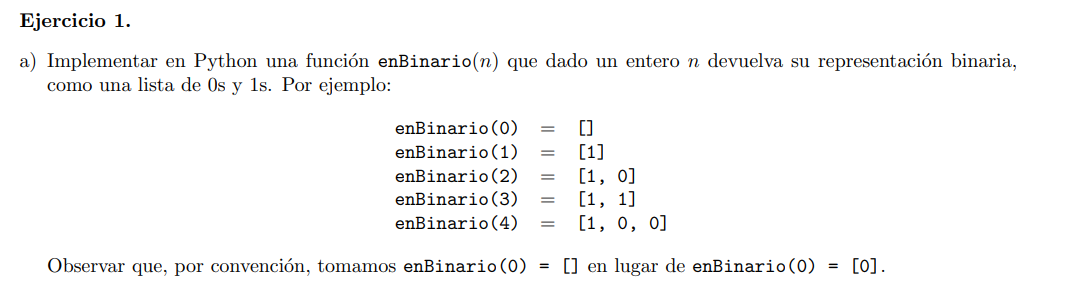

In [1]:
def enBase(n, b):
    digitos = []
    while n > 0:
        n, ultimo_digito = divmod(n, b)
        digitos.append(ultimo_digito)
    return digitos[::-1]

def deBase(n, b):
    res = 0
    for d in n:
        res = res * b + d
    return res

print(enBase(14,2))

[1, 1, 1, 0]


In [3]:
print(enBase(2,2))
print(enBase(13,2))

[1, 0]
[1, 1, 0, 1]


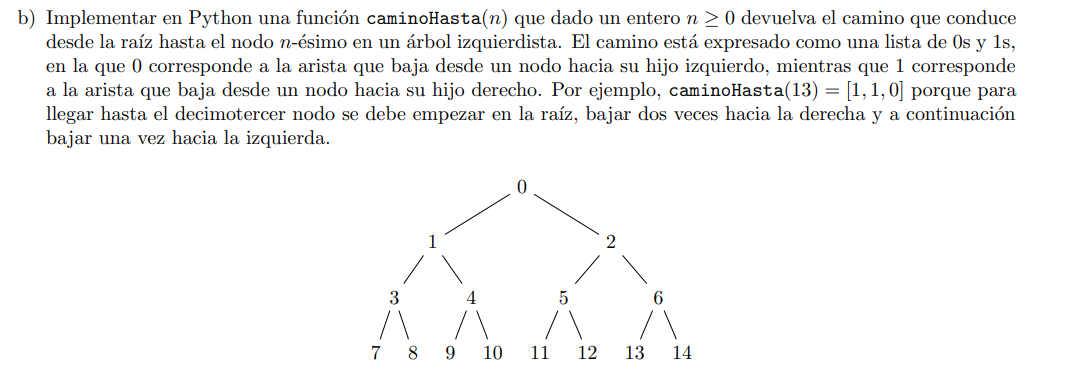

In [2]:
def camino_hasta(n):
    if n == 0:
        return []  # la raíz no tiene camino

    camino = []
    while n > 0:
        if n % 2 == 1:
            camino.append(0)  # hijo izquierdo
        else:
            camino.append(1)  # hijo derecho
        n = (n - 1) // 2  # subir al padre

    return camino[::-1]  # invertir para ir desde la raíz hasta n

print(camino_hasta(13))

[1, 1, 0]


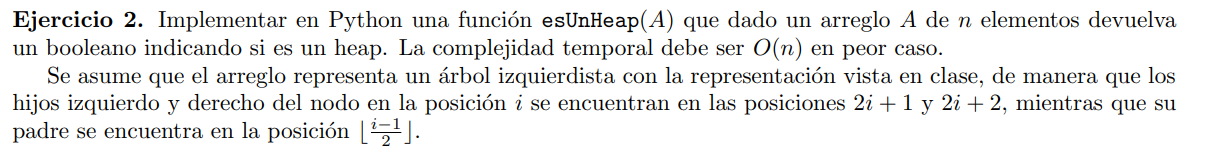

In [8]:
def esRaiz(i): return i == 0
def enRango(heap, i): return 0 <= i < len(heap)
def hijoIzq(i): return 2 * i + 1
def hijoDer(i): return 2 * i + 2
def padre(i): return (i - 1) // 2


def es_un_heap(heap):
    for i in range(len(heap)):
        if hijoIzq(i) < len(heap) and heap[i] < heap[hijoIzq(i)]:
            return False
        if hijoDer(i) < len(heap) and heap[i] < heap[hijoDer(i)]:
            return False
    return True

print(es_un_heap([10, 5, 3, 2, 1]))
print(es_un_heap([7, 5, 6, 1, 4, 3, 4]))
print(es_un_heap([10, 15, 3, 2, 4]))

True
True
False


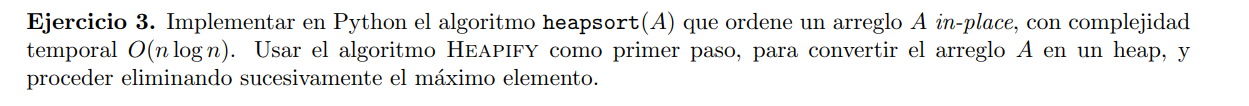

In [ ]:
def esRaiz(i): return i == 0
def enRango(i, n): return 0 <= i < n
def hijoIzq(i): return 2 * i + 1
def hijoDer(i): return 2 * i + 2
def padre(i): return (i - 1) // 2

def indiceDelHijoMayor(heap, i, n):
    izq = hijoIzq(i)
    der = hijoDer(i)
    if enRango(der, n) and heap[der] > heap[izq]:
        return der
    else:
        return izq

def tieneHijoMayor(heap, i, n):
    izq = hijoIzq(i)
    der = hijoDer(i)
    return (enRango(izq, n) and heap[izq] > heap[i]) or (enRango(der, n) and heap[der] > heap[i])

def ajustarHaciaAbajo(heap, i, n):
    while tieneHijoMayor(heap, i, n):
        j = indiceDelHijoMayor(heap, i, n)
        heap[i], heap[j] = heap[j], heap[i]
        i = j

def heapify(heap):
    n = len(heap)
    for i in range(n - 1, -1, -1):
        ajustarHaciaAbajo(heap, i, n)

def heap_sort(heap):
    n = len(heap)
    heapify(heap)

    for i in range(n - 1, 0, -1):
        heap[0], heap[i] = heap[i], heap[0]
        ajustarHaciaAbajo(heap, 0, i)  # ojo: ahora solo hasta i

    return heap

heap = [1,4,2,7,5,3,6]
print(heap_sort(heap))

[1, 2, 3, 4, 5, 6, 7]
